# Real-Time Lane Detection using OpenCV

## Importing all the dependencies

In [1]:
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

## Loading all the frames

In [2]:
col_frames = os.listdir("...../road_detection/frames")
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

In [3]:
col_img = []
for i in tqdm_notebook(col_frames):
    img = cv2.imread("......../road_detection/frames/"+i)
    col_img.append(img)

<ipython-input-3-b238d3a6a9ce>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(col_frames):


Ploting a random frame

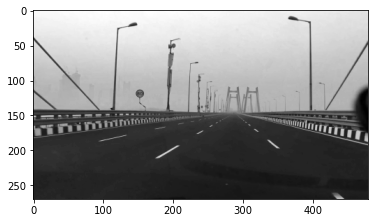

In [4]:
idx=47

plt.imshow(col_img[idx][:,:,0],cmap='gray')

## Frame Mask Creation

In [5]:
stencil = np.zeros_like(col_img[0][:,:,0])

polygon = np.array([[50,270], [220,160], [360,160], [480,270]])

cv2.fillConvexPoly(stencil,polygon,1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

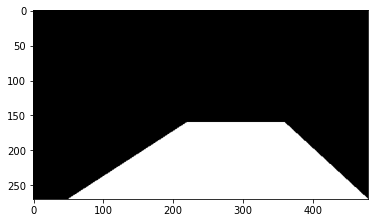

In [6]:
plt.imshow(stencil,cmap='gray')

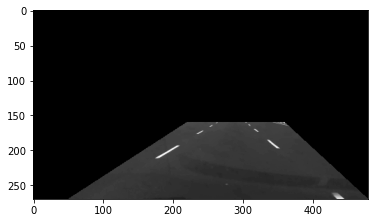

In [7]:
img = cv2.bitwise_and(col_img[idx][:,:,0],col_img[idx][:,:,0],mask=stencil)
plt.imshow(img,cmap='gray')

## Image Pre-processing
We have to perform a couple of image pre-processing operations on the video frames to detect the desired lane. The pre-processing operations are:

1. Image Thresholding or Canny Edge Detection.You can do anyone of this. Here I have implemented both.

2. Hough Line Transformation.

Image Thresholding

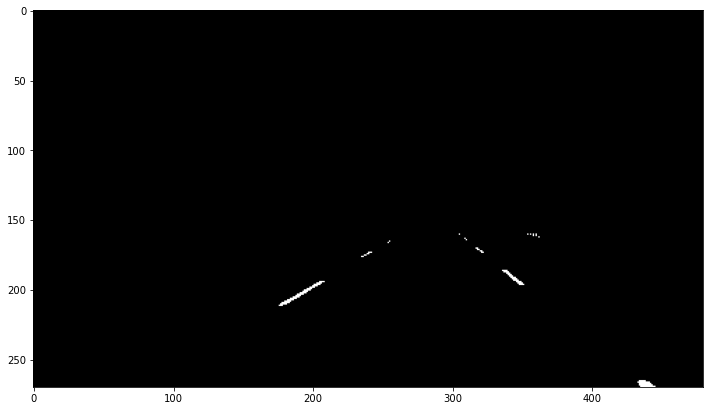

In [8]:
ret,thresh = cv2.threshold(img,130,145,cv2.THRESH_BINARY)

plt.figure(figsize=(12,10))
plt.imshow(thresh,cmap='gray')

Canny Edge Detection

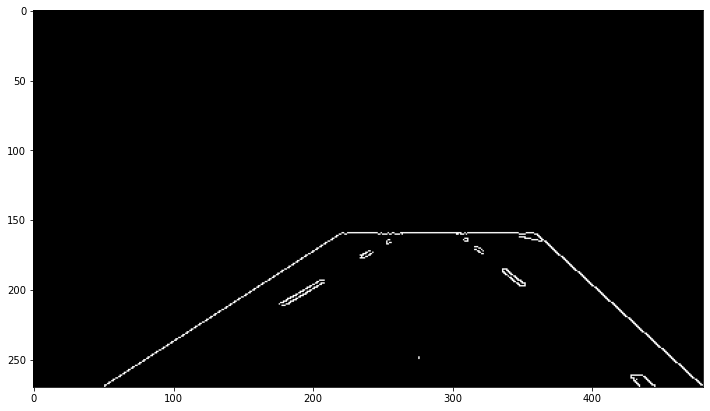

In [9]:
edges = cv2.Canny(img,130,145)

plt.figure(figsize=(12,10))
plt.imshow(edges,cmap='gray')

Hough Line Transformation

In [10]:
lines_cn = cv2.HoughLinesP(thresh,1,np.pi/180,30,maxLineGap=200)


In [11]:
lines_th = cv2.HoughLinesP(edges,1,np.pi/180,30,maxLineGap=200)


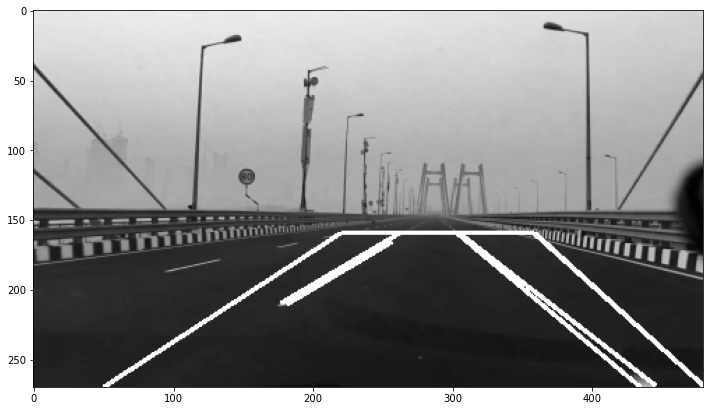

In [12]:
dumy = col_img[idx][:,:,0].copy()
for line in lines_th:
    x1,y1,x2,y2 = line[0]
    cv2.line(dumy,(x1,y1),(x2,y2),(255,0,0),2)

plt.figure(figsize=(12,10))
plt.imshow(dumy,cmap='gray')

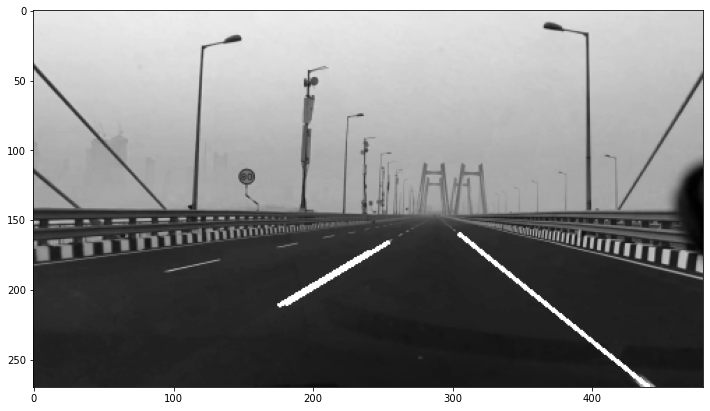

In [13]:
dumy_cn = col_img[idx][:,:,0].copy()
for line in lines_cn:
    x1,y1,x2,y2 = line[0]
    cv2.line(dumy_cn,(x1,y1),(x2,y2),(255,0,0),2)

plt.figure(figsize=(12,10))
plt.imshow(dumy_cn,cmap='gray')

Now we will apply all these operations on each and every frame. We will also save the resultant frames in a new directory:

In [34]:
cnt = 0

for img in tqdm_notebook(col_img):
  
  # apply frame mask
  masked = cv2.bitwise_and(img[:,:,0], img[:,:,0], mask=stencil)
  
  # apply image thresholding
  ret, thresh = cv2.threshold(masked, 130, 145, cv2.THRESH_BINARY)

  # apply Hough Line Transformation
  lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
  dmy = img.copy()
  
  # Plot detected lines
  try:
    for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)
  
    cv2.imwrite("......../road_detection/frames1/"+str(cnt)+'.png',dmy)
  
  except TypeError: 
    cv2.imwrite("....../road_detection/frames1/"+str(cnt)+'.png',img)

  cnt+= 1

<ipython-input-34-3eae90d29f37>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img in tqdm_notebook(col_img):


## Vedio Preparation

In [35]:
# input frames path
pathIn= "......./road_detection/frames1/"

# output path to save the video
pathOut = 'lane_detect.mp4'

# specify frames per second
fps = 30.0

In [36]:
from os.path import isfile, join

# get file names of the frames
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key=lambda f: int(re.sub('\D', '', f)))

Next, we will get all the frames with the detected lane into a list:

In [37]:
frame_list = []

for i in tqdm_notebook(range(len(files))):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_list.append(img)

<ipython-input-37-56b3b2183549>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(files))):


Finally, we can now combine the frames into a video by using the code below:

In [38]:
# write the video
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_list)):
    # writing to a image array
    out.write(frame_list[i])

out.release()